# Astroquery tutorial notebook

Install astroquery via running "conda install -c conda-forge astroquery" from inside an anaconda environment

Information from https://astroquery.readthedocs.io/en/latest/gaia/gaia.html


In [30]:
from astroquery.gaia import Gaia
import astropy.units as u
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt


# Launch job directly from ADQL script

In [39]:
job = Gaia.launch_job_async("""SELECT TOP 100 ra, dec
                                FROM gaiadr2.gaia_source 
                                ORDER BY source_id""",
                            dump_to_file=True, output_format='csv')

#documentation for this function: https://astroquery.readthedocs.io/en/latest/api/astroquery.gaia.GaiaClass.html#astroquery.gaia.GaiaClass.launch_job_async

In [40]:
print(job)

Jobid: 1652751998130O
Phase: COMPLETED
Owner: None
Output file: 1652751998130O-result.csv
Results: None


To look at our results, we can load the csv in numpy

In [41]:
job.outputFile  # Source code at https://github.com/astropy/astroquery/blob/main/astroquery/utils/tap/model/job.py

'1652751998130O-result.csv'

In [42]:
ra,dec = np.loadtxt(job.outputFile, delimiter=',', unpack=True,skiprows=1)

Text(0, 0.5, 'DEC [deg[')

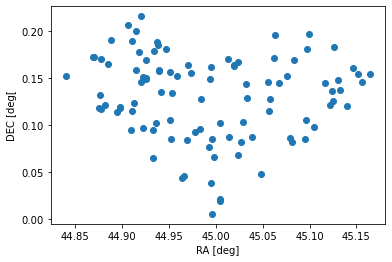

In [43]:
plt.plot(ra,dec,'o')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

You may notice that byt changing the TOP number, we get different shapes in the output image. This is just a result of how the objects are ordered by ID.

This is the method by which most of the examples will be demonstrated, but there are other options which are wrapper functions provided by astroquery, as we'll see now:

# Get all information in a rectangular neighborhood of a point

Lets look at a rectangular region of angular area 0.01 square degrees, centered on the point (RA,DEC) = (280,-60) in degrees. We will use Gaia DR2 as our source and limit the output to 50 objects

In [11]:
Gaia.MAIN_GAIA_TABLE = "gaiadr2.gaia_source"        # This is the default table used, but we set it explicitly for clarity
Gaia.ROW_LIMIT = 50         # This is the default number of rows (sources) returned, but we set it explicitly for clarity

coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs') # See https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html
width = u.Quantity(0.1, u.deg)
height = u.Quantity(0.1, u.deg)

r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [14]:
r.pprint(max_lines=12, max_width=200)   # the arguments here just set how the result of the query is displayed, not how it is saved

         dist             solution_id             DESIGNATION          ... lum_percentile_lower lum_percentile_upper                                     datalink_url                                   
                                                                       ...        solLum               solLum                                                                                           
--------------------- ------------------- ---------------------------- ... -------------------- -------------------- -----------------------------------------------------------------------------------
0.0026034636994048854 1635721458409799680 Gaia DR2 6636090334814214528 ...                   --                   -- https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+6636090334814214528
0.0038518741347606357 1635721458409799680 Gaia DR2 6636090339113063296 ...          0.062135242           0.07354171 https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+663609033911306

In [19]:
r; # A long output

# Get all information in a circular neighborhood of a point

In [92]:
Gaia.MAIN_GAIA_TABLE = "gaiadr2.gaia_source"        # This is the default table used, but we set it explicitly for clarity
Gaia.ROW_LIMIT = 100000        # This is the default number of rows (sources) returned, but we set it explicitly for clarity

coord = SkyCoord(ra=280, dec=-60, unit=(u.degree, u.degree), frame='icrs')
radius = u.Quantity(1.0, u.deg)
j = Gaia.cone_search_async(coord, radius)

INFO: Query finished. [astroquery.utils.tap.core]


In [93]:
r = j.get_results()  # We can assign the job to a variable and assign the query result in this way

In [94]:
r; # A long output

In [95]:
r.pprint(max_lines=12, max_width=200)

    solution_id             DESIGNATION               source_id      ... lum_percentile_upper                                     datalink_url                                             dist        
                                                                     ...        solLum                                                                                                                 
------------------- ---------------------------- ------------------- ... -------------------- ----------------------------------------------------------------------------------- ---------------------
1635721458409799680 Gaia DR2 6636090334814214528 6636090334814214528 ...                   -- https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+6636090334814214528 0.0026034636994048854
1635721458409799680 Gaia DR2 6636090339113063296 6636090339113063296 ...           0.07354171 https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+6636090339113063296 0.0038518741347606357


### Plot the objects 

In [96]:
r[0] # all data about first object 

solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64
1635721458409799680,Gaia DR2 6636090334814214528,6636090334814214528,1176213019,2015.5,280.0002535109784,0.29861262266219235,-60.00259470935402,0.3286090424553563,-0.3110984894867886,0.4659006859423401,-0.66773564,-0.3829646819799206,0.5485869545050303,-6.494624923325772,0.5631744832783001,0.14009339,-0.032677036,-0.040756915,0.1848471,-0.24814793,0.25431943,-0.020390274,-0.41731763,-0.023678254,0.053505838,273,0,272,1,2.0634625,316.8305,0.8687575596881527,0.8324284930248446,31,False,0.08247371,1.5682945669210009,0.10173123960452841,0.09272486,31,14,0.5277922,0,32,False,277,229.27686620684315,1.1770479415122068,194.78975,19.787466,29,132.09798809841195,9.236134667236668,14.302302,20.049149,25,169.83721262885817,6.933962725221738,24.493528,19.186838,1.3169022,0,0.8623104,0.2616825,0.6006279,--,--,0,--,--,--,NOT_AVAILABLE,335.4869899853897,-21.882743330467846,276.222852405146,-36.779152165694725,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+6636090334814214528,0.0026034636994048854


In [97]:
ra = r['ra']
dec = r['dec']

(277.9330431829841, 282.06756279365425, -61.03309493839806, -58.96668784150832)

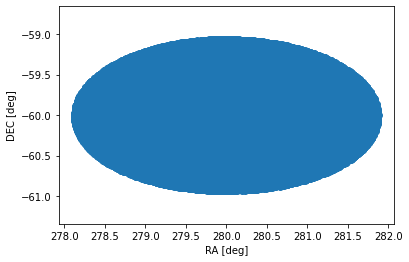

In [104]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.plot(ra,dec,'o')
plt.xlabel('RA [deg]')
plt.ylabel('DEC [deg]')

plt.axis('equal')
#ax.set_aspect('equal', adjustable='datalim')